<a href="https://colab.research.google.com/github/Cptdaas/DL_modelTraining/blob/learning_branch/01_DigitclassificationusingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
X_train[0][18:22],y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
         148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
         253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
         253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0]], dtype=uint8),
 5)

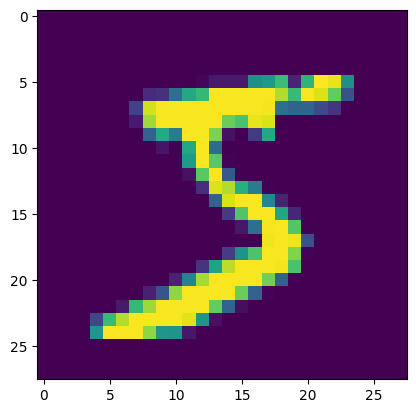

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
X_train =X_train/255
X_test =X_test/255
X_train[0][20],X_test[0][20]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09411765, 0.44705882, 0.86666667, 0.99215686, 0.99215686,
        0.99215686, 0.99215686, 0.78823529, 0.30588235, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.79607843, 0.99607843,
        0.85882353, 0.1372549 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]))

In [14]:
model =Sequential()

model.add(Flatten(input_shape=(28,28))) # this will convert your data into 1D 28*28=784
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics='accuracy')

In [17]:
model.fit(X_train,y_train,epochs =10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 4ms/step - loss: 0.2909 - accuracy: 0.9163 - val_loss: 0.1611 - val_accuracy: 0.9524
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9632 - val_loss: 0.1230 - val_accuracy: 0.9637
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9753 - val_loss: 0.1039 - val_accuracy: 0.9693
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0865 - val_accuracy: 0.9731
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0941 - val_accuracy: 0.9730
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0885 - val_accuracy

In [18]:
y_prob =model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_prob

array([[1.1715156e-08, 4.6272628e-11, 5.3104962e-08, ..., 9.9996197e-01,
        9.1381596e-09, 4.7355124e-06],
       [8.9491345e-11, 2.9208306e-07, 9.9999976e-01, ..., 1.8554674e-16,
        1.3128928e-09, 1.8475224e-15],
       [1.0488570e-05, 9.9849892e-01, 3.1245328e-04, ..., 6.9733022e-04,
        2.8172403e-04, 8.4692118e-07],
       ...,
       [1.8013026e-15, 3.9730971e-13, 3.2080073e-17, ..., 3.4727304e-08,
        1.3330236e-09, 2.3076479e-06],
       [3.5707134e-16, 3.3214112e-15, 1.1621455e-16, ..., 4.6186462e-15,
        1.5687684e-07, 9.0172764e-15],
       [2.3078827e-11, 1.0285108e-12, 1.8209489e-11, ..., 7.7992756e-16,
        2.1905196e-13, 1.7313702e-13]], dtype=float32)

In [20]:
y_pred =y_prob.argmax(axis=1)

In [21]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9757

In [23]:
model1 =Sequential()

model1.add(Flatten(input_shape=(28,28))) # this will convert your data into 1D 28*28=784
model1.add(Dense(128,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [24]:
model1

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics ='accuracy')

In [39]:
history = model1.fit(X_train,y_train,validation_split=0.2,epochs=15)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.3337 - val_accuracy: 0.9744
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.3404 - val_accuracy: 0.9759
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.3278 - val_accuracy: 0.9772
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.2886 - val_accuracy: 0.9793
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.3674 - val_accuracy: 0.9759
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.3195 - val_accuracy: 0.9773
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.3189 - val_accuracy:

In [40]:
y_prob =model1.predict(X_test)
y_pred =y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [41]:
accuracy_score(y_test,y_pred)

0.9797

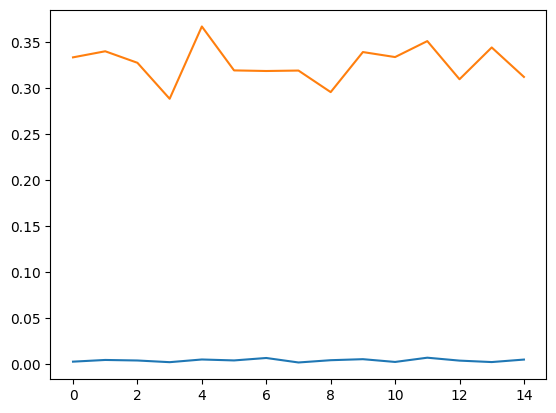

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

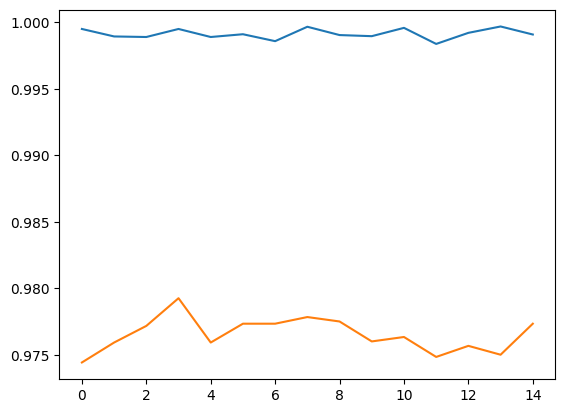

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 32ms/step


(<matplotlib.image.AxesImage at 0x7ed0545be7d0>, array([2]))

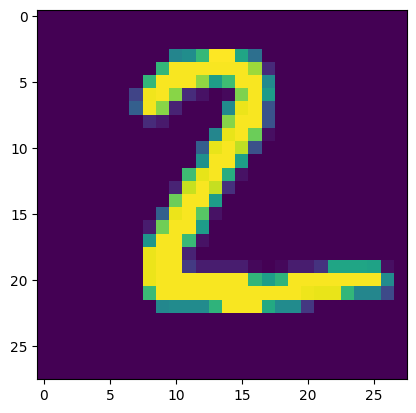

In [45]:
plt.imshow(X_test[1]),model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)